### Target Analysis

    Winning The Toss and winning the match is directly proportionate - Done
    Which team has won the toss and choose to bat first most number of times
    Analysis of teams winning choosing to field first
    highest winning percentage  of which team at home ground or particular venue
    Player with most MOTM
    In the result of the matches are completely independent of the umpires, or there are umpires for whomever some particular team has won unnaturally high or low
    ratio of DL method applied and not applied
    Ratio of matches being played on a particular season

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

In [2]:
ipl = pd.read_csv("matches.csv")
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
team_name_updates = {
    'Rising Pune Supergiant':'Rising Pune Supergiants',
    'Pune Warriors':'Rising Pune Supergiants',
    'Sunrisers Hyderabad':'Deccan Chargers',
    'Delhi Capitals':'Delhi Daredevils'
}



In [4]:
ipl['team1'] = ipl['team1'].replace(team_name_updates)
ipl['team2'] = ipl['team2'].replace(team_name_updates)
ipl['toss_winner'] = ipl['toss_winner'].replace(team_name_updates)
ipl['winner'] = ipl['winner'].replace(team_name_updates)

In [5]:
home_team_mapping = {
    'Bangalore':'Royal Challengers Bangalore',
    'Pune':'Rising Pune Supergiants',
    'Kolkata':'Kolkata Knight Riders',
    'Mumbai':'Mumbai Indians',
    'Chennai':'Chennai Super Kings',
    'Delhi': 'Delhi Daredevils',
    'Hyderabad':'Deccan Chargers',
    'Mohali':'Kings XI Punjab',
    'Kochi':'Kochi Tuskers Kerala',
    'Ahmedabad':'Gujarat Lions',
    'Jaipur':'Rajasthan Royals'
}
ipl['home_team'] = ipl['city'].map(home_team_mapping)
ipl['home_team'].fillna('no home team',inplace= True)


### Winning The Toss and winning the match is directly proportionate

In [6]:
ipl['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [7]:
ipl3 = ipl[['result','winner']]
ipl3.head()

,result,winner
0,normal,Deccan Chargers
1,normal,Rising Pune Supergiants
2,normal,Kolkata Knight Riders
3,normal,Kings XI Punjab
4,normal,Royal Challengers Bangalore


In [8]:
ipl4 = ipl3[ipl3['result']=='no result']
ipl4.head()

,result,winner
300,no result,NaN
545,no result,NaN
570,no result,NaN
744,no result,NaN


In [9]:
ipl5 = ipl3[ipl3['result']=='tie']
ipl5.head()

,result,winner
33,tie,Mumbai Indians
125,tie,Rajasthan Royals
189,tie,Kings XI Punjab
387,tie,Deccan Chargers
400,tie,Royal Challengers Bangalore


In [10]:
# create a new column indicating the match outcome 
ipl['match_outcome'] = ipl['result'].map({
    'normal': 1,
    'tie':0,
    'no result':-1
})

In [11]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,home_team,match_outcome
0,1,IPL-2017,Hyderabad,05-04-2017,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Deccan Chargers,1
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Rising Pune Supergiants,1
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,no home team,1
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,no home team,1
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Royal Challengers Bangalore,1


In [12]:
match_df = ipl[['result','match_outcome']]
match_df1 = match_df[match_df['result']=='no result']
match_df1.head()

,result,match_outcome
300,no result,-1
545,no result,-1
570,no result,-1
744,no result,-1


In [13]:
ipl.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'home_team', 'match_outcome'],
      dtype='object')

In [14]:
ipl['toss_win_match_win'] = ipl.apply(
    lambda row: 1 if row['toss_winner'] == row['winner'] else 0 , axis=1
)

In [15]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,home_team,match_outcome,toss_win_match_win
0,1,IPL-2017,Hyderabad,05-04-2017,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Deccan Chargers,1,0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,...,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Rising Pune Supergiants,1,1
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,no home team,1,1
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,no home team,1,1
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Royal Challengers Bangalore,1,1


In [16]:
correlation = ipl['toss_win_match_win'].corr(ipl['match_outcome'])

In [17]:
correlation

0.05630063413968335

In [18]:
cross_tab = pd.crosstab(ipl['toss_win_match_win'],ipl['match_outcome'])
cross_tab

match_outcome,-1,0,1
toss_win_match_win,,,
0,4,4,355
1,0,5,388


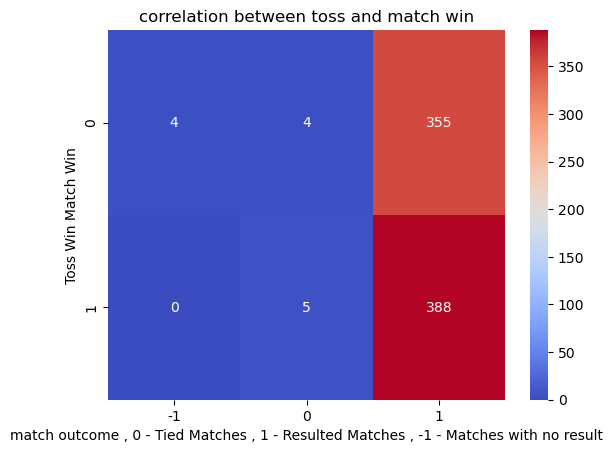

In [19]:
ax = sns.heatmap(cross_tab,annot=True,fmt = "d",cmap = "coolwarm",cbar= True)
plt.title("correlation between toss and match win")
plt.xlabel("match outcome , 0 - Tied Matches , 1 - Resulted Matches , -1 - Matches with no result")
plt.ylabel("Toss Win Match Win")
plt.show()


In [20]:
ipl.to_csv("updated_ipl.csv")

In [21]:
#  winning the matches of the teams based on the grounds they played on

winning_team_data = ipl[['city','winner']]
winning_team_data.head()

,city,winner
0,Hyderabad,Deccan Chargers
1,Pune,Rising Pune Supergiants
2,Rajkot,Kolkata Knight Riders
3,Indore,Kings XI Punjab
4,Bangalore,Royal Challengers Bangalore


In [22]:
city_winner_counts = winning_team_data.groupby(['city','winner']).size().reset_index(name='count')
city_winner_counts.head(10)
chennai_winning_matches = ipl[(ipl['winner']=='Chennai Super Kings') & (ipl['city']=='Chennai')]
chennai_playing_matches = ipl[(ipl['team1']=='Chennai Super Kings')|(ipl['team2']=='Chennai Super Kings')]

In [23]:
city_winner_counts_pivot = city_winner_counts.pivot_table(index = 'city', columns='winner',values='count', fill_value=0)

In [24]:
city_winner_counts_pivot

winner,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore
city,,,,,,,,,,,
Abu Dhabi,1,0,0,0,2,0,1,0,3,0,0
Ahmedabad,0,1,1,0,1,0,0,1,7,0,1
Bangalore,4,3,3,1,5,0,6,8,3,1,30
Bengaluru,1,0,1,0,0,0,2,1,1,0,7
Bloemfontein,0,0,1,0,1,0,0,0,0,0,0
Cape Town,0,2,1,0,1,0,0,1,1,0,1
Centurion,2,2,2,0,0,0,1,1,2,0,2
Chandigarh,3,4,1,2,22,0,3,4,3,1,3
Chennai,40,2,2,0,2,0,2,5,1,1,2


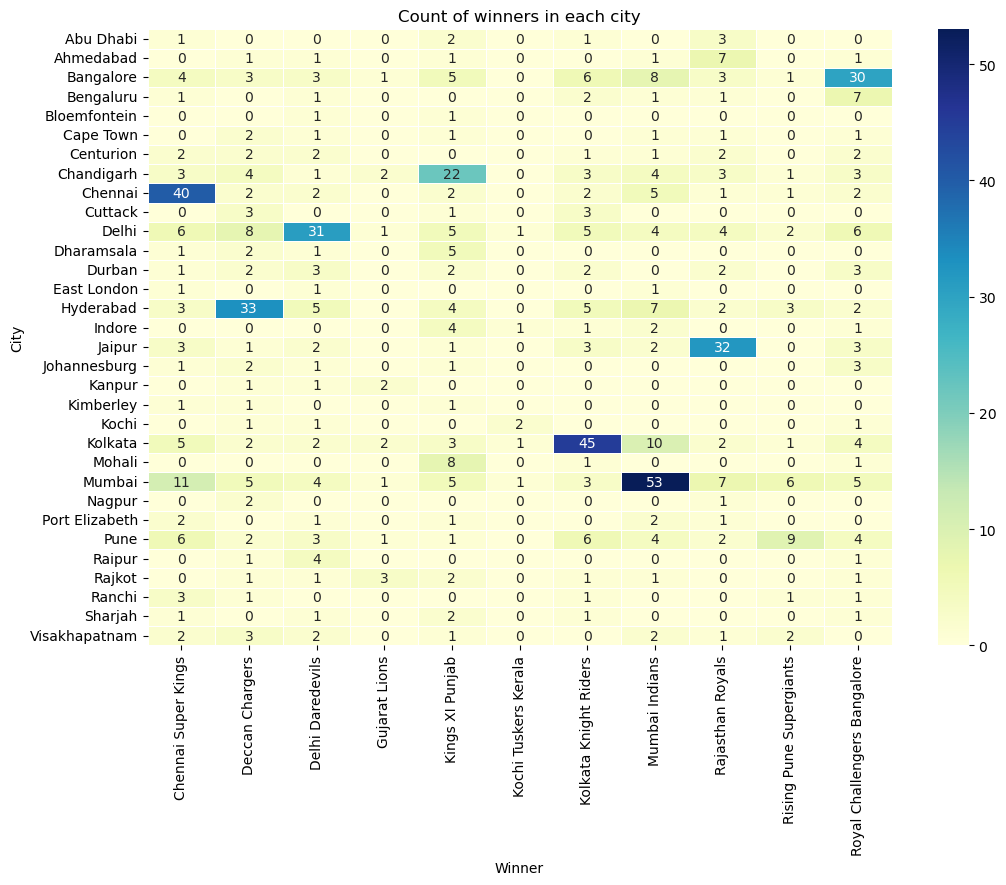

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(city_winner_counts_pivot,cmap='YlGnBu',annot=True,fmt='d',linewidths=0.5)
plt.title('Count of winners in each city')
plt.xlabel('Winner')
plt.ylabel('City')
plt.xticks(rotation=90)
plt.show()

In [26]:
dl_counts = ipl['dl_applied'].value_counts()
dl_counts.head()

0    737
1     19
Name: dl_applied, dtype: int64

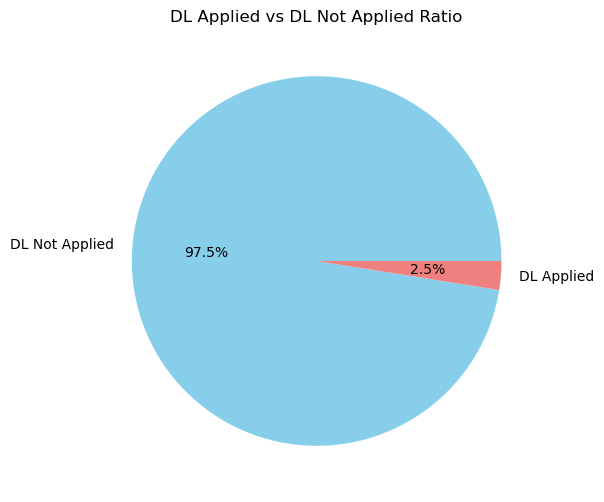

In [27]:
plt.figure(figsize=(6,6))
plt.pie(dl_counts,labels=['DL Not Applied','DL Applied'],autopct="%1.1f%%",colors=['skyblue','lightcoral'])
plt.title('DL Applied vs DL Not Applied Ratio')
plt.show()

In [28]:
ipl['team1'].unique()

array(['Deccan Chargers', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

In [29]:
#  rising pune supergiants ,rising pune supergiant, pune warriors
#  sunrisers hyderabad and deccan charges
#  Delhi daredevils and Delhi capitals

In [32]:
ipl[['city','team1','team2','winner','home_team']]

,city,team1,team2,winner,home_team
0,Hyderabad,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers
1,Pune,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,Rising Pune Supergiants
2,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,no home team
3,Indore,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,no home team
4,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
...,...,...,...,...,...
751,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Mumbai Indians
752,Chennai,Chennai Super Kings,Mumbai Indians,Mumbai Indians,Chennai Super Kings
753,Visakhapatnam,Deccan Chargers,Delhi Daredevils,Delhi Daredevils,no home team
754,Visakhapatnam,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,no home team


In [33]:
home_winner = ipl[ipl['winner']==ipl['home_team']]

In [36]:
home_winner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 751
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  283 non-null    int64 
 1   Season              283 non-null    object
 2   city                283 non-null    object
 3   date                283 non-null    object
 4   team1               283 non-null    object
 5   team2               283 non-null    object
 6   toss_winner         283 non-null    object
 7   toss_decision       283 non-null    object
 8   result              283 non-null    object
 9   dl_applied          283 non-null    int64 
 10  winner              283 non-null    object
 11  win_by_runs         283 non-null    int64 
 12  win_by_wickets      283 non-null    int64 
 13  player_of_match     283 non-null    object
 14  venue               283 non-null    object
 15  umpire1             282 non-null    object
 16  umpire2             282 no

In [37]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  756 non-null    int64 
 1   Season              756 non-null    object
 2   city                749 non-null    object
 3   date                756 non-null    object
 4   team1               756 non-null    object
 5   team2               756 non-null    object
 6   toss_winner         756 non-null    object
 7   toss_decision       756 non-null    object
 8   result              756 non-null    object
 9   dl_applied          756 non-null    int64 
 10  winner              752 non-null    object
 11  win_by_runs         756 non-null    int64 
 12  win_by_wickets      756 non-null    int64 
 13  player_of_match     752 non-null    object
 14  venue               756 non-null    object
 15  umpire1             754 non-null    object
 16  umpire2             754 no

In [38]:
home_team_stats = ipl.groupby(['home_team','match_outcome']).size().unstack().fillna(0)

In [39]:
home_team_stats

match_outcome,-1,0,1
home_team,,,
Chennai Super Kings,0.0,1.0,56.0
Deccan Chargers,0.0,1.0,63.0
Delhi Daredevils,1.0,1.0,72.0
Gujarat Lions,0.0,1.0,11.0
Kings XI Punjab,0.0,0.0,10.0
Kochi Tuskers Kerala,0.0,0.0,5.0
Kolkata Knight Riders,0.0,0.0,77.0
Mumbai Indians,0.0,1.0,100.0
Rajasthan Royals,0.0,0.0,47.0


In [41]:
ipl['match_outcome'].value_counts()

 1    743
 0      9
-1      4
Name: match_outcome, dtype: int64

In [42]:
home_team_stats['win_percentage'] = (home_team_stats[1]/(home_team_stats[1]+home_team_stats[0]))*100

In [43]:
home_team_stats['win_percentage']

home_team
Chennai Super Kings             98.245614
Deccan Chargers                 98.437500
Delhi Daredevils                98.630137
Gujarat Lions                   91.666667
Kings XI Punjab                100.000000
Kochi Tuskers Kerala           100.000000
Kolkata Knight Riders          100.000000
Mumbai Indians                  99.009901
Rajasthan Royals               100.000000
Rising Pune Supergiants        100.000000
Royal Challengers Bangalore     98.437500
no home team                    98.529412
Name: win_percentage, dtype: float64

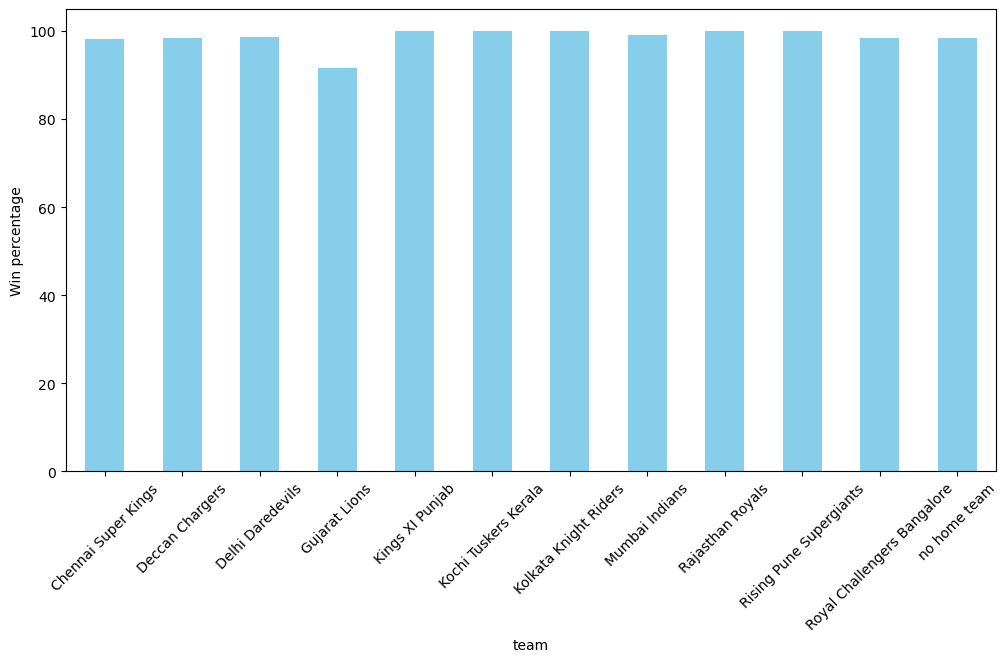

In [45]:
plt.figure(figsize=(12,6))
home_team_stats['win_percentage'].plot(kind='bar',color='skyblue')
plt.xlabel('team')
plt.ylabel('Win percentage')
plt.xticks(rotation=45)
plt.show()

In [46]:
ipl['Season'].value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2014    60
IPL-2016    60
IPL-2018    60
IPL-2019    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

In [47]:
season_matches_count = ipl['Season'].value_counts().reset_index()
season_matches_count.columns=['Season','Matches']

In [48]:
season_matches_count.head()

,Season,Matches
0,IPL-2013,76
1,IPL-2012,74
2,IPL-2011,73
3,IPL-2010,60
4,IPL-2014,60


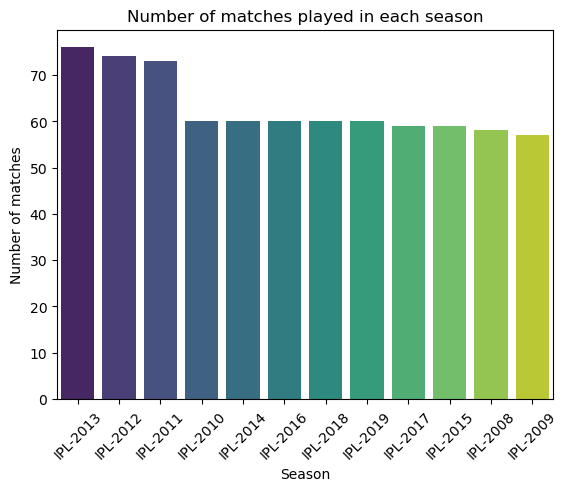

In [51]:
sns.barplot(x = 'Season',y='Matches',data=season_matches_count,palette='viridis')
plt.title('Number of matches played in each season')
plt.xlabel('Season')
plt.ylabel('Number of matches')
plt.xticks(rotation=45)
plt.show()
